# Assignment-3
Due date Oct. 10

- Pranay manikanta Narava
- MT50255
- Date: 10/09/2022


In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [1]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override() 
%matplotlib inline
warnings.filterwarnings('ignore')

## Annualized the daily return and standard deviation for each respective stock.

In [3]:
stocks = ['AAPL', 'AMZN','MMM','XOM']
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2022, 1, 1)
stock_price = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  4 of 4 completed


In [4]:
stock_price.head()

Adj Close                                     \
                                 AAPL        AMZN         MMM        XOM   
Date                                                                       
2021-01-04 00:00:00-05:00  128.087082  159.331497  161.677658  37.906910   
2021-01-05 00:00:00-05:00  129.670715  160.925507  161.404877  39.733749   
2021-01-06 00:00:00-05:00  125.305794  156.919006  163.860092  40.747643   
2021-01-07 00:00:00-05:00  129.581635  158.108002  159.655167  41.067345   
2021-01-08 00:00:00-05:00  130.700073  159.134995  156.738998  41.524048   

                                Close                                     \
                                 AAPL        AMZN         MMM        XOM   
Date                                                                       
2021-01-04 00:00:00-05:00  129.410004  159.331497  171.869995  41.500000   
2021-01-05 00:00:00-05:00  131.009995  160.925507  171.580002  43.500000   
2021-01-06 00:00:00-05:00  126.599998  156.919006  174.190002  44.610001   
2021-01-07 00:00:00-05:00  130.919998  158.108002  169.720001  44.959999   
2021-01-08 00:00:00-05:00  132.050003  159.134995  166.619995  45.459999   

                                 High              ...         Low             \
                                 AAPL        AMZN  ...         MMM        XOM   
Date                                               ...                          
2021-01-04 00:00:00-05:00  133.610001  163.600006  ...  170.550003  41.000000   
2021-01-05 00:00:00-05:00  131.740005  161.169006  ...  170.649994  41.830002   
2021-01-06 00:00:00-05:00  131.050003  159.875504  ...  172.039993  43.700001   
2021-01-07 00:00:00-05:00  131.630005  160.427002  ...  166.160004  44.529999   
2021-01-08 00:00:00-05:00  132.630005  159.531998  ...  164.610001  44.950001   

                                 Open                                     \
                                 AAPL        AMZN         MMM        XOM   
Date                                                                       
2021-01-04 00:00:00-05:00  133.520004  163.500000  175.000000  41.450001   
2021-01-05 00:00:00-05:00  128.889999  158.300507  172.009995  41.840000   
2021-01-06 00:00:00-05:00  127.720001  157.324005  172.720001  44.410000   
2021-01-07 00:00:00-05:00  128.360001  157.850006  171.559998  45.000000   
2021-01-08 00:00:00-05:00  132.429993  159.000000  169.169998  45.200001   

                              Volume                               
                                AAPL      AMZN      MMM       XOM  
Date                                                               
2021-01-04 00:00:00-05:00  143301900  88228000  2996200  27764700  
2021-01-05 00:00:00-05:00   97664900  53110000  2295300  44035100  
2021-01-06 00:00:00-05:00  155088000  87896000  3346400  36484800  
2021-01-07 00:00:00-05:00  109578200  70290000  5863400  29528100  
2021-01-08 00:00:00-05:00  105158200  70754000  4808100  28628200  

[5 rows x 24 columns]

In [5]:
stock_price = stock_price['Close']

In [6]:
stock_price.head()

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04 00:00:00-05:00,129.410004,159.331497,171.869995,41.500000
2021-01-05 00:00:00-05:00,131.009995,160.925507,171.580002,43.500000
2021-01-06 00:00:00-05:00,126.599998,156.919006,174.190002,44.610001
2021-01-07 00:00:00-05:00,130.919998,158.108002,169.720001,44.959999
2021-01-08 00:00:00-05:00,132.050003,159.134995,166.619995,45.459999


In [7]:
stock_price.describe()

,AAPL,AMZN,MMM,XOM
count,252.000000,252.000000,252.000000,252.000000
mean,140.989365,167.193349,187.698810,57.963651
std,14.659580,8.002098,11.129615,5.017095
min,116.360001,147.597504,165.199997,41.500000
25%,128.962498,161.681870,177.760002,55.545001
50%,141.305000,167.061501,185.404999,58.830000
75%,148.962505,172.418747,198.272503,61.565001
max,180.330002,186.570496,207.330002,66.360001


In [8]:
stock_returns = stock_price.pct_change()

In [9]:
stock_returns

,AAPL,AMZN,MMM,XOM
Date,,,,
2021-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,0.012364,0.010004,-0.001687,0.048193
2021-01-06 00:00:00-05:00,-0.033662,-0.024897,0.015212,0.025517
2021-01-07 00:00:00-05:00,0.034123,0.007577,-0.025662,0.007846
2021-01-08 00:00:00-05:00,0.008631,0.006496,-0.018265,0.011121
...,...,...,...,...
2021-12-27 00:00:00-05:00,0.022975,-0.008178,0.009887,0.014258
2021-12-28 00:00:00-05:00,-0.005767,0.005844,0.005320,-0.003232
2021-12-29 00:00:00-05:00,0.000502,-0.008555,0.004335,-0.008753


In [10]:
return_mean = stock_returns.mean() * 252
return_mean

AAPL    0.349005
AMZN    0.074378
MMM     0.050562
XOM     0.434391
dtype: float64

In [11]:
ann_std = stock_returns.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_std

AAPL    26.831971
AMZN    26.234249
MMM     28.015217
XOM     22.435582
dtype: float64

In [12]:
assets = pd.concat([return_mean, ann_std], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,0.349005,26.831971
AMZN,0.074378,26.234249
MMM,0.050562,28.015217
XOM,0.434391,22.435582


## Draw efficient frontier.

In [13]:
p_ret = []
p_vol = [] 
p_weights = [] 

num_assets = len(stock_returns.columns)
num_portfolios = 10000

In [14]:
cov_matrix = stock_returns.cov() * np.sqrt(252)

In [15]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, return_mean)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_std = sd*np.sqrt(252)
    p_vol.append(ann_std)

In [16]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stock_returns.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [17]:
portfolios  = pd.DataFrame(data)
portfolios.head() 

,Returns,Volatility,AAPL weight,AMZN weight,MMM weight,XOM weight
0,0.308084,0.688841,0.382330,0.143450,0.109470,0.364750
1,0.240505,0.632304,0.179789,0.091355,0.379456,0.349400
2,0.240445,0.650949,0.399995,0.239299,0.191859,0.168847
3,0.332347,0.722158,0.387517,0.118041,0.068935,0.425507
4,0.153031,0.573667,0.157114,0.339627,0.379531,0.123728


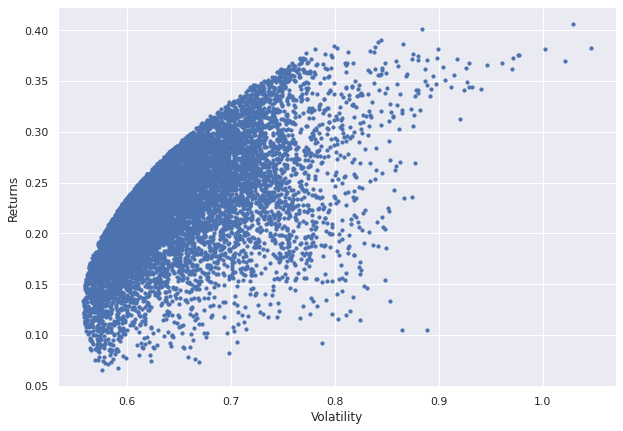

In [18]:
portfolios.plot.scatter(x='Volatility', y='Returns', s=10, figsize=[10,7])

## Assume risk free rate to be 0.01 & Calculate the sharpe ratio and interpret which one is the best.

In [19]:
stock_returns_mean = stock_returns.mean()
stock_returns_std = stock_returns.std()

Sharpe_Ratio =  (stock_returns_mean) / (stock_returns_std) 

In [20]:
Sharpe_Ratio

AAPL    0.087872
AMZN    0.019489
MMM     0.017012
XOM     0.091711
dtype: float64

In [21]:
Annual_Sharpe_Ratio = Sharpe_Ratio * (252**0.5)

In [22]:
Annual_Sharpe_Ratio

AAPL    1.394918
AMZN    0.309375
MMM     0.270062
XOM     1.455863
dtype: float64

##  calculate sharpe ratio with the PyPortfolioOpt 

In [23]:
!pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.risk_models import CovarianceShrinkage

In [ ]:
e_r = mean_historical_return(prices)
cov_matrix = CovarianceShrinkage(prices).ledoit_wolf()

In [29]:
mu = expected_returns.mean_historical_return(stock_price)
S = CovarianceShrinkage(stock_price).ledoit_wolf()


EF = EfficientFrontier(mu, S)
weights = EF.max_sharpe()
EF.portfolio_performance(verbose=True)

Expected annual return: 42.4%
Annual volatility: 19.7%
Sharpe Ratio: 2.05


(0.4237126634748412, 0.1969442891399553, 2.0498825593665693)